In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import time
sys.path.append('/user_data/mmhender/imStat/code/')
from utils import nsd_utils

In [ ]:
# First method that i was using to compute texture statistic features, was occasionally giving wildly
# varying outlier values for skew/kurtosis. This happens when variance is very small.
# This resulted in super tiny (-2 * 10e+16, etc) values for R2 sometimes. 
# Not always predictable which voxels would have these bad R2 values - because it depends on which pRF params
# were selected as best for a given voxel (the bad skew/kurt values only showed up for a few pRFs).
# I fixed the problem by setting a floor for variance (adding 10e-6 to variance estimates).
# Old versions saved with suffix _ORIG or _VERS2, loading them for comparison here.


In [2]:
# Model 353 is one of the pRFs giving bad values.

vind = 943; mind = 353;
x,y,sigma = (0.2026315789473685, 0.4342105263157895, 0.03999999910593033)
vind, mind, x, y, sigma

(943, 353, 0.2026315789473685, 0.4342105263157895, 0.03999999910593033)

In [6]:
# This one is good

fn1 = '/user_data/mmhender/features/pyramid_texture/S1_features_each_prf_4ori_4sf.h5py'

t = time.time()
with h5py.File(fn1, 'r') as data_set:
    vals1 = np.copy(data_set['/features'][:,:,mind])
    data_set.close() 
elapsed = time.time() - t
print('Took %.5f seconds to load file'%elapsed)


Took 86.42893 seconds to load file


In [7]:
# This one is bad

fn2 = '/user_data/mmhender/features/pyramid_texture/S1_features_each_prf_4ori_4sf_VERS2.h5py'

t = time.time()
with h5py.File(fn2, 'r') as data_set:
    vals2 = np.copy(data_set['/features'][:,:,mind])
    data_set.close() 
elapsed = time.time() - t
print('Took %.5f seconds to load file'%elapsed)


Took 86.00632 seconds to load file


In [8]:
# Also bad

fn3 = '/user_data/mmhender/features/pyramid_texture/S1_features_each_prf_4ori_4sf_ORIG.h5py'

t = time.time()
with h5py.File(fn3, 'r') as data_set:
    vals3 = np.copy(data_set['/features'][:,:,mind])
    data_set.close() 
elapsed = time.time() - t
print('Took %.5f seconds to load file'%elapsed)


Took 81.08002 seconds to load file


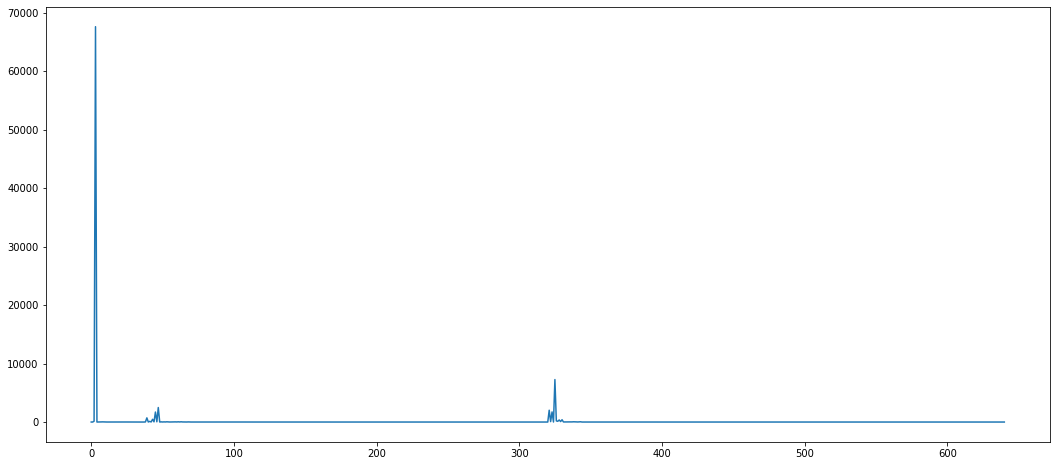

In [25]:
plt.figure(figsize=(18,8))
plt.plot(np.max(vals1, axis=0))

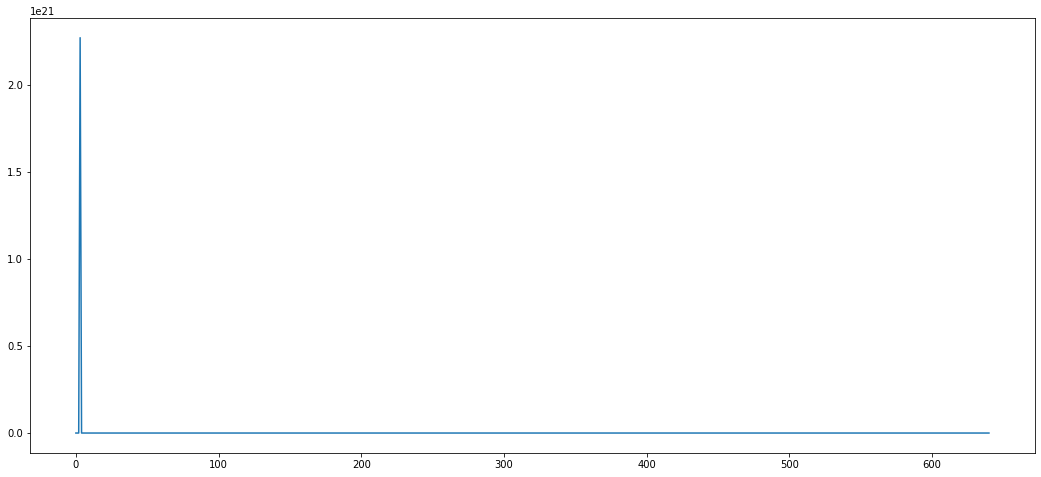

In [26]:
plt.figure(figsize=(18,8))
plt.plot(np.max(vals2, axis=0))

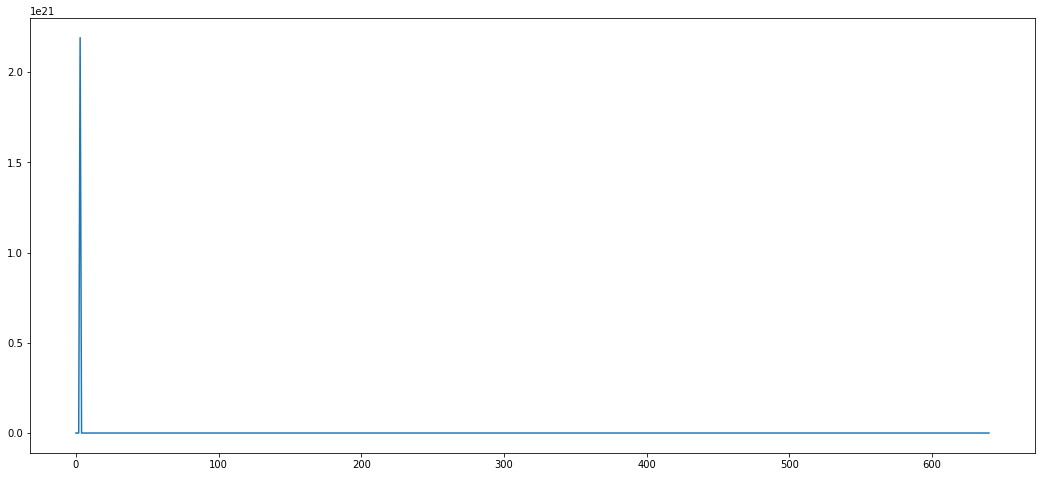

In [27]:
plt.figure(figsize=(18,8))
plt.plot(np.max(vals3, axis=0))

In [10]:
image_order = nsd_utils.get_master_image_order()
# Choosing which sessions we're analyzing now - same sessions as the voxel data that will be loaded.
session_inds = nsd_utils.get_session_inds_full()
sessions = np.arange(0,10)
if np.isscalar(sessions):
    sessions = [sessions]
sessions = np.array(sessions)
inds2use = np.isin(session_inds, sessions)
image_order = image_order[inds2use]

shared_1000_inds = image_order<1000

image_order_val = image_order[shared_1000_inds]
image_order_trn = image_order[~shared_1000_inds]


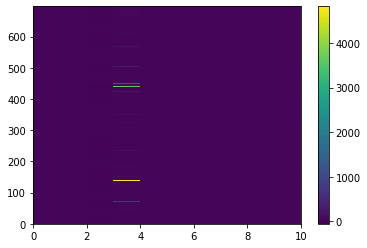

In [19]:
# Looking for big values
feat1 = vals1[image_order_val,:]
import matplotlib.pyplot as plt
plt.figure;
plt.pcolormesh(feat1[:,0:10])
# plt.pcolormesh(scipy.stats.zscore(feat_np[:,0:10], axis=0))
plt.colorbar()

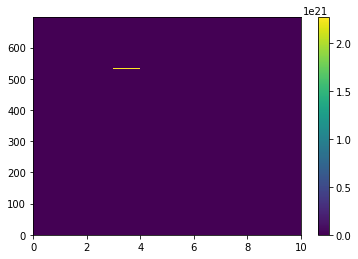

In [20]:
feat2 = vals2[image_order_val,:]
import matplotlib.pyplot as plt
plt.figure;
plt.pcolormesh(feat2[:,0:10])
# plt.pcolormesh(scipy.stats.zscore(feat_np[:,0:10], axis=0))
plt.colorbar()

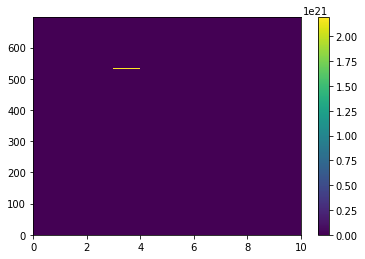

In [21]:
feat3 = vals3[image_order_val,:]
import matplotlib.pyplot as plt
plt.figure;
plt.pcolormesh(feat3[:,0:10])
# plt.pcolormesh(scipy.stats.zscore(feat_np[:,0:10], axis=0))
plt.colorbar()

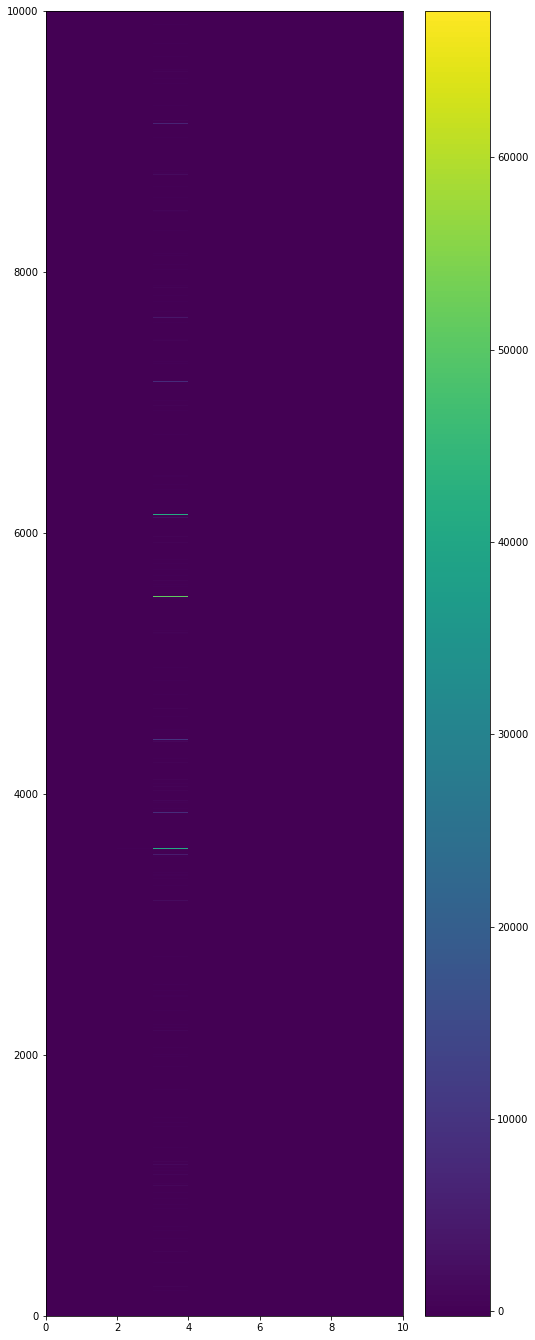

In [15]:
# Looking for big outlier values in the first few columns

import matplotlib.pyplot as plt
plt.figure(figsize=(8,24));
plt.pcolormesh(vals1[:,0:10])
# plt.pcolormesh(scipy.stats.zscore(feat_np[:,0:10], axis=0))
plt.colorbar()

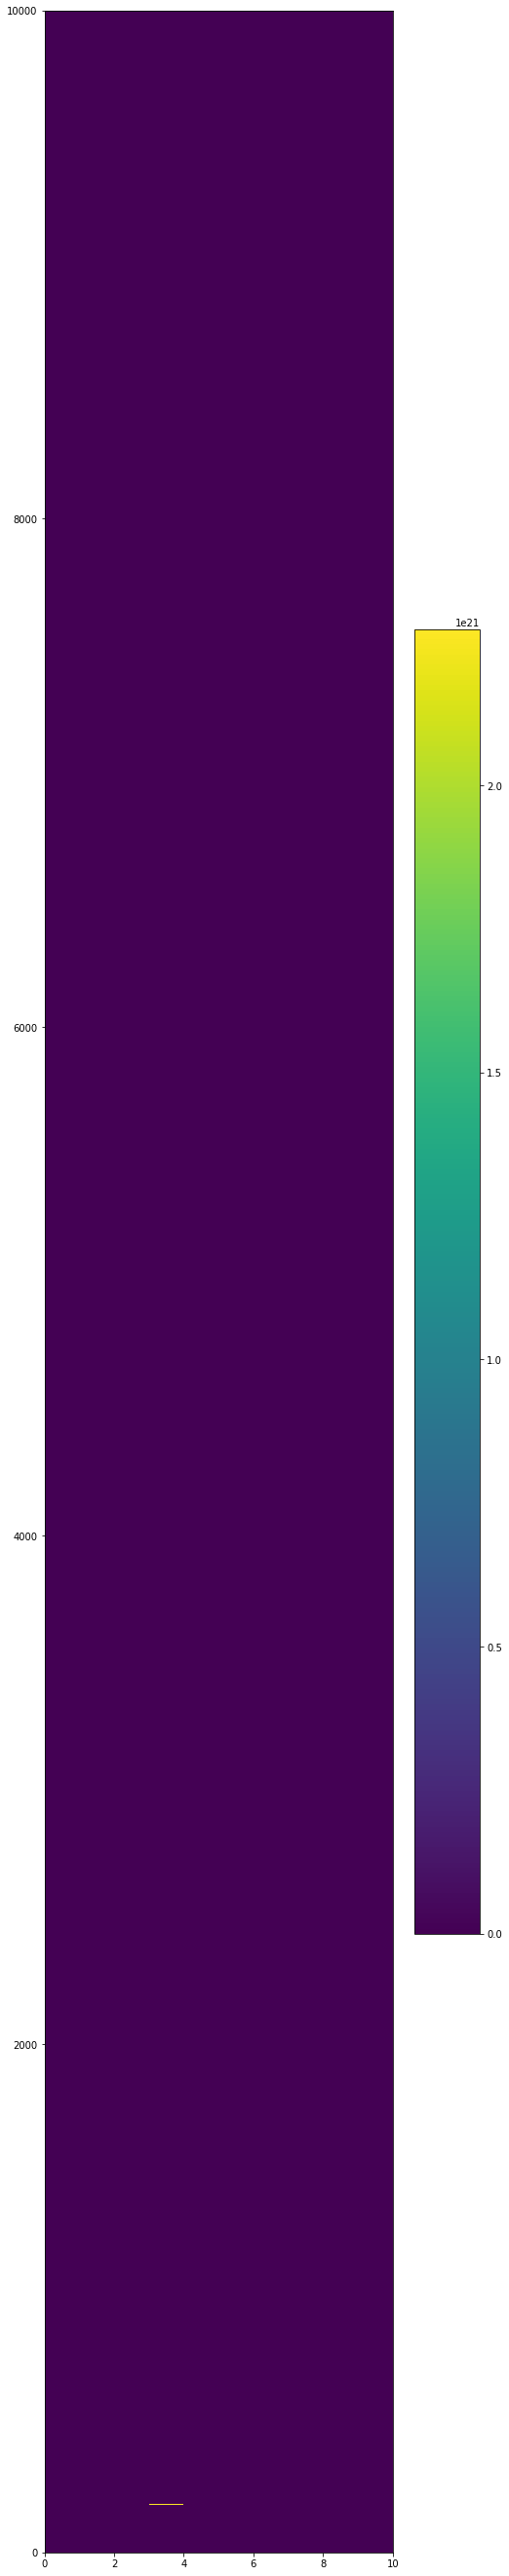

In [17]:
# Looking for big outlier values in the first few columns

import matplotlib.pyplot as plt
plt.figure(figsize=(8,48));
plt.pcolormesh(vals2[:,0:10])
# plt.pcolormesh(scipy.stats.zscore(feat_np[:,0:10], axis=0))
plt.colorbar()

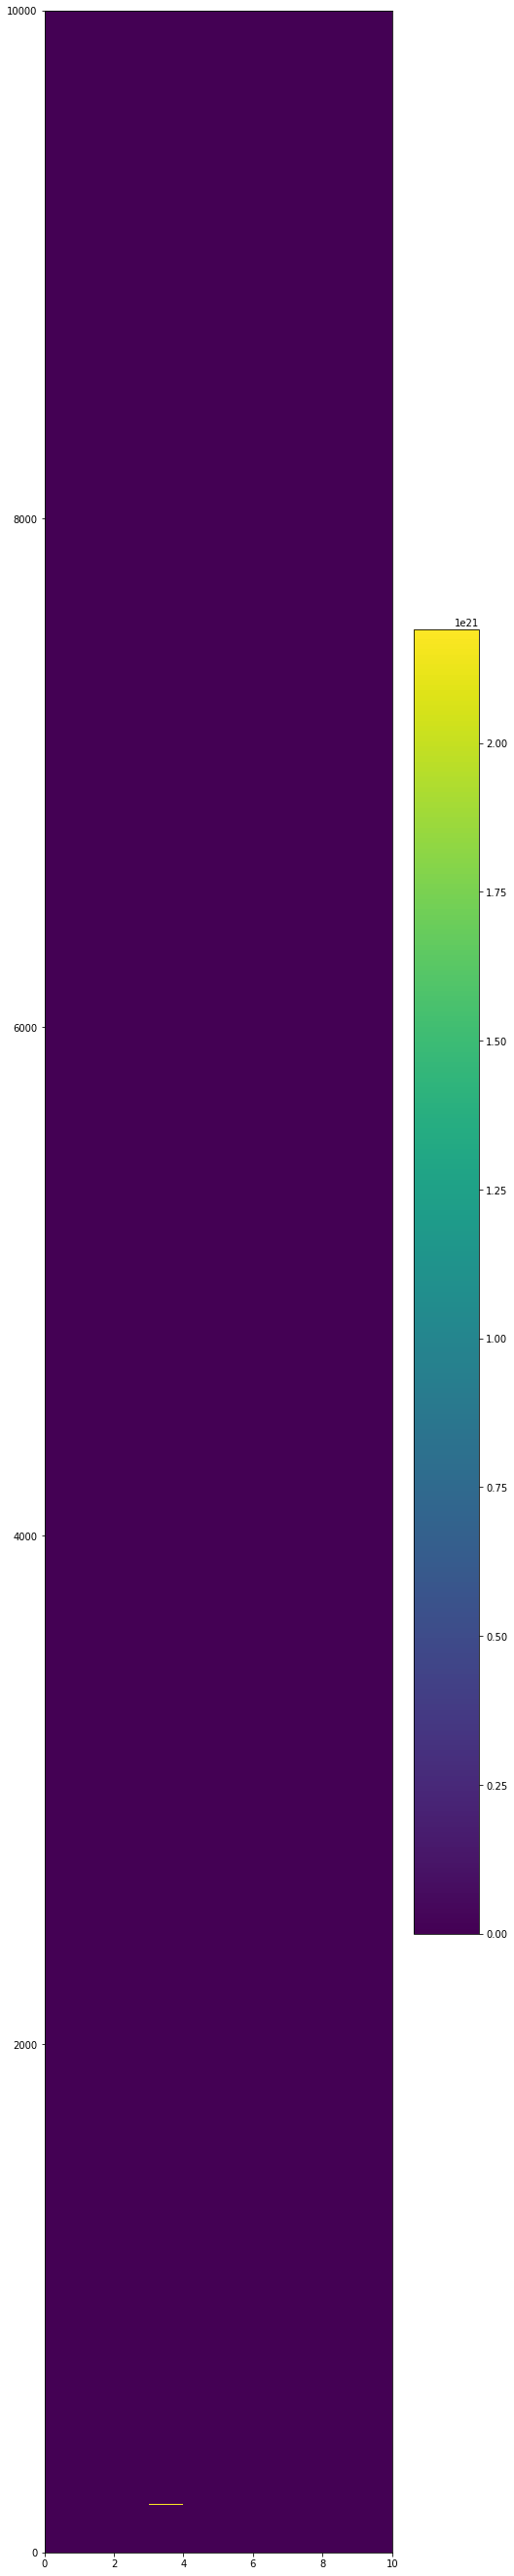

In [18]:
# Looking for big outlier values in the first few columns

import matplotlib.pyplot as plt
plt.figure(figsize=(8,48));
plt.pcolormesh(vals3[:,0:10])
# plt.pcolormesh(scipy.stats.zscore(feat_np[:,0:10], axis=0))
plt.colorbar()